In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [284]:
data = pd.read_csv("threats.csv")

In [3]:
data_for_log=data.iloc[:30000]

In [4]:
data_for_log["Threat"]

0        0
1        0
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    0
29998    0
29999    0
Name: Threat, Length: 30000, dtype: int64

In [6]:
data_for_log

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Threat
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.01,0.23,2.48,-0.51,0.80,0.20,-0.23,-0.03,-0.15,-0.26,...,0.09,0.95,-0.25,-0.14,-0.16,0.33,-0.22,-0.56,0.17,0
29996,0.00,-4.01,-4.77,-0.11,-0.93,2.49,0.75,-0.28,-0.26,0.43,...,-0.16,0.52,0.37,0.49,0.69,0.35,0.05,-0.43,0.16,0
29997,-0.01,0.02,2.21,0.98,-7.31,0.58,0.44,0.90,0.50,-1.24,...,0.31,-1.85,-1.48,1.72,1.73,-2.22,-0.40,0.12,-0.05,0
29998,-0.02,2.46,-2.00,-0.65,0.80,-1.58,0.32,1.68,-0.29,2.36,...,-0.11,0.88,0.50,-0.06,-0.90,-0.05,0.08,0.21,-0.04,0


In [17]:
X_train = data_for_log.drop("Threat",axis=1)
Y_train  = data_for_log["Threat"]

In [18]:
#Standard Scaling
X_train_std = np.array((X_train - X_train.mean())/X_train.std())

In [19]:
from sklearn.linear_model import LogisticRegression
Log_reg_model=LogisticRegression()
Log_reg_model.fit(X_train_std,Y_train)

LogisticRegression()

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(Log_reg_model.predict(X_train_std),Y_train)

0.9980666666666667

## Umm.. I am sorry but am I supposed to be getting that high of an accuracy, wait lemme try the prediction on an unseen test sample

In [6]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
test_data=data.iloc[30000:50000]
test_X = Scaler.fit_transform(test_data.drop("Threat",axis=1))
test_Y = test_data["Threat"]

In [16]:
accuracy_score(Log_reg_model.predict(test_X),test_Y)

0.9983

## Umm... wait a second, it can't be that easy

In [17]:
data["Threat"].value_counts()

Threat
0    998092
1      1908
Name: count, dtype: int64

In [22]:
998092/1000000

0.998092

### 😂😂 Okay okay got it, so what my Logistic Regression Model is doing is simply firing Not a threat for all the samples(and since they are an overwhelming majority, I am getting this astounding accuracy, which is roughly equal to the percentage of non-threating samples in the data

In [10]:
#Let's try the most obvious thing first
from sklearn.tree import DecisionTreeClassifier
Cls = DecisionTreeClassifier()
Cls.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Cls.predict(test_X),test_Y)

0.99505

### Alright seems brilliant, but the thing is, the tree could also be simply just spitting out 'not a threat' at every sample and getting away with it, so we need better metrics than accuracy score

In [11]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(test_Y,Cls.predict(test_X))

In [12]:
fpr=dict()
tpr=dict()
roc_auc=dict()
fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), Cls.predict(test_X).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [13]:
roc_auc=auc(fpr['micro'],tpr['micro'])

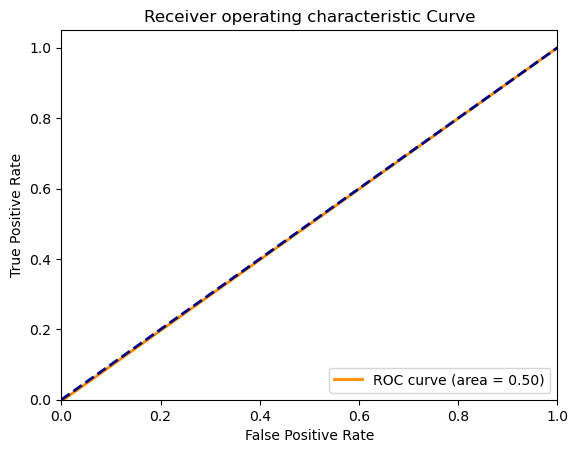

In [14]:
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(
    fpr['micro'],
    tpr['micro'],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic Curve")
plt.legend(loc="lower right")
plt.show()

In [15]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,Cls.predict(test_X))
#the value makes sense given that the model isn't very definite in distinguishing between true positives and false
#positives

0.49784633877591905

## Alright, so the roc curve plots the proportion of true positives against false positives at various thresholds. And the auc score tells us the probability that the model was a able to distinguish between true positives and false positives, so in a true sense it is a correct metric for decision trees
### If we evaluate auc score for our logistic regression model, we get:

In [21]:
roc_auc_score(test_Y,Log_reg_model.predict(test_X)) 

0.5

### About the same(even better) auc score than decision trees. Which means that our decision tree isn't particularly that good, and we have do some data engineering to increase the auc score

### So the major problem here is class imbalance, the non-threat samples are an overwhelming majority, we have try to balance them, some reading tells me there are some ways to do this:

## Random Oversampling - Replicating the minority class to increase their freq.
## Random Undersampling - Removing the majority class to decrease their freq.


### SMOTE - Synthetic Minority Oversampling Tecnhique. Here, we have to pick up any of the minority samples from the dataset, and pick K samples closest to it, and then create synthetic minority samples between the chosen sample and the newly selected ones.

In [201]:
def generate_minority_sample(choosen_sample,nearest_sample):
    return np.array([np.random.uniform(low = x,high = y) for (x,y) in zip(choosen_sample,nearest_sample)])
generate_minority_sample([1,2,3,4],[5,6,7,8]) #Yep seems to work

array([4.34639737, 5.48725124, 3.96544993, 7.59842703])

In [29]:
data[data["Threat"]==1]

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Threat
1053,-0.01,1.89,-3.43,-0.02,-1.01,0.41,-7.28,-1.44,0.90,-0.79,...,-0.18,-0.44,0.54,0.85,1.28,0.54,0.02,-0.25,0.08,1
1139,0.00,-6.17,-3.07,-0.88,0.87,0.61,0.66,1.63,-0.83,2.50,...,-0.21,0.22,0.68,0.14,0.47,0.09,-0.10,-0.30,0.08,1
1581,-0.02,2.47,-1.62,-0.86,1.16,0.37,0.40,0.64,-0.50,0.33,...,0.13,-1.05,-0.54,0.03,0.41,0.02,-0.05,-0.05,0.01,1
2516,-0.02,2.60,-3.46,-0.02,-0.68,-2.47,1.19,0.34,1.59,0.22,...,-0.14,-0.55,0.76,0.25,-0.02,0.10,0.09,0.10,-0.07,1
2533,-0.01,-2.27,2.18,-0.47,0.55,0.24,-0.05,-0.47,0.03,-0.59,...,-0.03,-0.30,-0.29,-1.03,0.03,0.22,0.04,-0.89,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999037,0.01,-4.20,2.66,-0.06,-0.03,0.24,-0.34,-1.67,0.64,-2.73,...,-0.03,-0.87,0.56,1.51,0.07,-0.75,-0.61,0.15,-0.07,1
999257,0.02,-7.38,1.51,-0.18,-0.12,0.30,0.45,-0.68,0.38,0.18,...,0.46,0.46,-1.48,1.65,-0.15,-1.52,0.62,1.37,-0.45,1
999390,-0.02,1.17,2.59,-0.15,-0.74,-0.06,0.01,-0.16,0.52,0.02,...,0.32,0.99,-1.48,-0.61,0.05,-0.27,1.59,-0.05,0.01,1
999497,0.00,-5.23,-3.10,-0.92,0.94,0.59,0.80,1.62,-0.84,2.45,...,-0.01,0.77,-0.11,-0.16,0.51,-0.01,-0.04,-0.12,0.03,1


## So the plan here is as follows:
### I have around 2000 samples in the minority class, if I find 20 closest sample to each of them and then generate 20 random samples between that particular minority class and the closest sample,  we will end up with 2000 x 20 = 40000 synthetically created Minority samples. Not sure if the methodology is correct but let's see.

In [202]:
minority_sample = np.array(data[data["Threat"]==1])

In [31]:
sample = minority_sample[0]

In [32]:
np.linalg.norm(data.iloc[0]-sample)

11.979912353602593

In [33]:
Synthetic_data = []
num = 1
for sample in minority_sample:
    print(num," Iter.")
    num+=1
    closest_20_samples = sorted(list(enumerate(np.linalg.norm(data-sample,axis=1))),key = lambda x:x[1])[1:21]
    for idx in closest_20_samples:
        sam = data.iloc[idx[0]]
        Synthetic_data.append(generate_minority_sample(sample,sam))
    

1  Iter.
2  Iter.
3  Iter.
4  Iter.
5  Iter.
6  Iter.
7  Iter.
8  Iter.
9  Iter.
10  Iter.
11  Iter.
12  Iter.
13  Iter.
14  Iter.
15  Iter.
16  Iter.
17  Iter.
18  Iter.
19  Iter.
20  Iter.
21  Iter.
22  Iter.
23  Iter.
24  Iter.
25  Iter.
26  Iter.
27  Iter.
28  Iter.
29  Iter.
30  Iter.
31  Iter.
32  Iter.
33  Iter.
34  Iter.
35  Iter.
36  Iter.
37  Iter.
38  Iter.
39  Iter.
40  Iter.
41  Iter.
42  Iter.
43  Iter.
44  Iter.
45  Iter.
46  Iter.
47  Iter.
48  Iter.
49  Iter.
50  Iter.
51  Iter.
52  Iter.
53  Iter.
54  Iter.
55  Iter.
56  Iter.
57  Iter.
58  Iter.
59  Iter.
60  Iter.
61  Iter.
62  Iter.
63  Iter.
64  Iter.
65  Iter.
66  Iter.
67  Iter.
68  Iter.
69  Iter.
70  Iter.
71  Iter.
72  Iter.
73  Iter.
74  Iter.
75  Iter.
76  Iter.
77  Iter.
78  Iter.
79  Iter.
80  Iter.
81  Iter.
82  Iter.
83  Iter.
84  Iter.
85  Iter.
86  Iter.
87  Iter.
88  Iter.
89  Iter.
90  Iter.
91  Iter.
92  Iter.
93  Iter.
94  Iter.
95  Iter.
96  Iter.
97  Iter.
98  Iter.
99  Iter.
100  Iter.
101  Ite

756  Iter.
757  Iter.
758  Iter.
759  Iter.
760  Iter.
761  Iter.
762  Iter.
763  Iter.
764  Iter.
765  Iter.
766  Iter.
767  Iter.
768  Iter.
769  Iter.
770  Iter.
771  Iter.
772  Iter.
773  Iter.
774  Iter.
775  Iter.
776  Iter.
777  Iter.
778  Iter.
779  Iter.
780  Iter.
781  Iter.
782  Iter.
783  Iter.
784  Iter.
785  Iter.
786  Iter.
787  Iter.
788  Iter.
789  Iter.
790  Iter.
791  Iter.
792  Iter.
793  Iter.
794  Iter.
795  Iter.
796  Iter.
797  Iter.
798  Iter.
799  Iter.
800  Iter.
801  Iter.
802  Iter.
803  Iter.
804  Iter.
805  Iter.
806  Iter.
807  Iter.
808  Iter.
809  Iter.
810  Iter.
811  Iter.
812  Iter.
813  Iter.
814  Iter.
815  Iter.
816  Iter.
817  Iter.
818  Iter.
819  Iter.
820  Iter.
821  Iter.
822  Iter.
823  Iter.
824  Iter.
825  Iter.
826  Iter.
827  Iter.
828  Iter.
829  Iter.
830  Iter.
831  Iter.
832  Iter.
833  Iter.
834  Iter.
835  Iter.
836  Iter.
837  Iter.
838  Iter.
839  Iter.
840  Iter.
841  Iter.
842  Iter.
843  Iter.
844  Iter.
845  Iter.
846  Iter.

KeyboardInterrupt: 

In [22]:
Synthetic_data_np = np.array(Synthetic_data)
Synthetic_data_df = pd.DataFrame(Synthetic_data_np)
Synthetic_data_df[88] = pd.Series([1]*len(Synthetic_data_np))
Synthetic_data_df.rename({88:"Threat"},axis=1,inplace=True)
Synthetic_data_df.to_csv("Synth_threat_data.csv")
Syn_data = pd.read_csv("Synth_threat_data.csv")
Syn_data.drop(["Unnamed: 0"],axis=1,inplace=True)

## I might be crazy but I am gonna mix this data in the complete data

In [23]:
new_df = pd.concat([data,Syn_data]).reset_index().drop(["index"],axis=1)

In [36]:
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Threat
0,-0.01,-0.43,2.22,-0.59,0.80,0.21,-0.19,0.30,-0.25,0.42,...,-0.07,0.30,-0.19,0.61,-0.04,0.36,-0.18,-0.24,0.07,0
1,0.00,-4.11,1.48,0.92,-7.37,0.60,0.37,1.95,0.19,0.85,...,-0.57,-0.27,1.17,-0.52,-1.43,-0.24,-0.41,0.71,-0.22,0
2,0.01,-5.03,-2.78,-0.83,0.92,0.46,0.10,1.36,-0.74,1.62,...,-0.13,0.33,0.38,0.41,-0.61,0.24,-0.10,-1.19,0.37,0
3,-0.02,1.98,2.30,0.87,-7.09,0.36,0.16,1.79,0.23,0.26,...,0.07,0.41,-0.81,-0.49,0.07,-0.20,-0.31,-0.55,0.18,0
4,-0.01,0.14,-2.43,-0.68,0.73,-1.47,0.68,1.93,-0.35,3.12,...,-0.04,0.03,0.07,-0.05,-0.02,-0.01,0.00,-0.20,0.07,0


### Let's shuffle it as the data are present in clusters

In [24]:
new_df = new_df.sample(frac=1,axis=0).sample(frac=1).reset_index(drop=True)

In [82]:
from sklearn.metrics import roc_auc_score  # The auc(area under the ROC Curve) simply gives an idea as to how well is the 
                                           # able to "distinguish" between the classes = (TPR/FPR)
from sklearn.metrics import precision_score #Precision Measures that out of the total samples that the model says to be 
                                            # "positive" how many were actually positive
from sklearn.metrics import recall_score # Contrary to Precision, here we only care about how many of the total samples
                                         # were labelled as positive,

def evaluate_tree(clf,test_X,test_Y):
    Y_pred  = clf.predict(test_X)
    print("Recall Score:",recall_score(test_Y,Y_pred))
    print("Precision Score:",precision_score(test_Y,Y_pred))
    print("AUC Score:",roc_auc_score(test_Y,Y_pred))

In [26]:
#Let's try the most obvious thing first
from sklearn.tree import DecisionTreeClassifier
Cls1 = DecisionTreeClassifier()
Cls1.fit(np.array(new_df.drop("Threat",axis=1)),np.array(new_df["Threat"]))

DecisionTreeClassifier()

In [27]:
evaluate_tree(Cls1,test_X,test_Y)

Recall Score: 0.17647058823529413
Precision Score: 0.0026513477684489617
AUC Score: 0.531714208271709


## I actually want to visualize how the tree is approaching this, and see if I can use it to make it better or something.

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

In [48]:
from sklearn.tree import export_graphviz
export_graphviz(
 Cls1,
 out_file = 'out_tree.dot',
 feature_names=new_df.drop("Threat",axis=1).columns.astype(str),
 class_names=new_df["Threat"].unique().astype(str),
 rounded=True,
 filled=True
 )

In [59]:
Data_for_train = new_df.iloc[:1000]
Sam_X = Data_for_train.drop("Threat",axis=1)
Sam_Y = Data_for_train["Threat"]

In [51]:
Cls_sample = DecisionTreeClassifier()
Cls_sample.fit(np.array(Data_for_train.drop("Threat",axis=1)),np.array(Data_for_train["Threat"]))

DecisionTreeClassifier()

In [66]:
Cls_sample.feature_importances_

array([0.02274572, 0.02327619, 0.03856698, 0.0806332 , 0.        ,
       0.        , 0.02172924, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.02515384, 0.        , 0.        , 0.0291609 ,
       0.        , 0.        , 0.00722034, 0.        , 0.        ,
       0.        , 0.01822556, 0.        , 0.0162005 , 0.        ,
       0.        , 0.05372237, 0.        , 0.        , 0.04686572,
       0.0233661 , 0.01215037, 0.02308571, 0.        , 0.        ,
       0.        , 0.00326903, 0.03946587, 0.        , 0.        ,
       0.0455639 , 0.02187067, 0.05705445, 0.01215037, 0.        ,
       0.        , 0.        , 0.00191754, 0.02154108, 0.        ,
       0.        , 0.        , 0.03537222, 0.00643544, 0.05607864,
       0.01084606, 0.04369583, 0.04026192, 0.        , 0.     

In [76]:
lst = list(enumerate(Cls1.feature_importances_))

In [79]:
lst.sort(key=lambda x:x[1])

In [80]:
lst

[(47, 0.002702986667262147),
 (24, 0.0028724455300810875),
 (36, 0.0030866431027036846),
 (8, 0.0032979955804827957),
 (46, 0.003327156195230101),
 (87, 0.0034315217561231045),
 (17, 0.003464888784760159),
 (15, 0.0035100073680868213),
 (25, 0.003538234953610319),
 (10, 0.003595560553568395),
 (31, 0.003661851848754696),
 (50, 0.0038048725836460876),
 (21, 0.0039019751499887708),
 (86, 0.004024000852259251),
 (33, 0.0040370507539592105),
 (23, 0.0040976513151345486),
 (7, 0.004213967908300726),
 (11, 0.004223679556023586),
 (28, 0.004230758160282636),
 (34, 0.004234276934043888),
 (13, 0.004244267903970155),
 (52, 0.004256147184374533),
 (9, 0.004306850610240959),
 (19, 0.004370996557022012),
 (82, 0.004380491725930768),
 (51, 0.004396898885259575),
 (22, 0.004447437035288976),
 (27, 0.004494810317299542),
 (79, 0.004522620477595903),
 (29, 0.00470428357181916),
 (67, 0.004840884009235868),
 (65, 0.004853653995403989),
 (66, 0.004909482855285182),
 (54, 0.004911004648121561),
 (5, 0.00

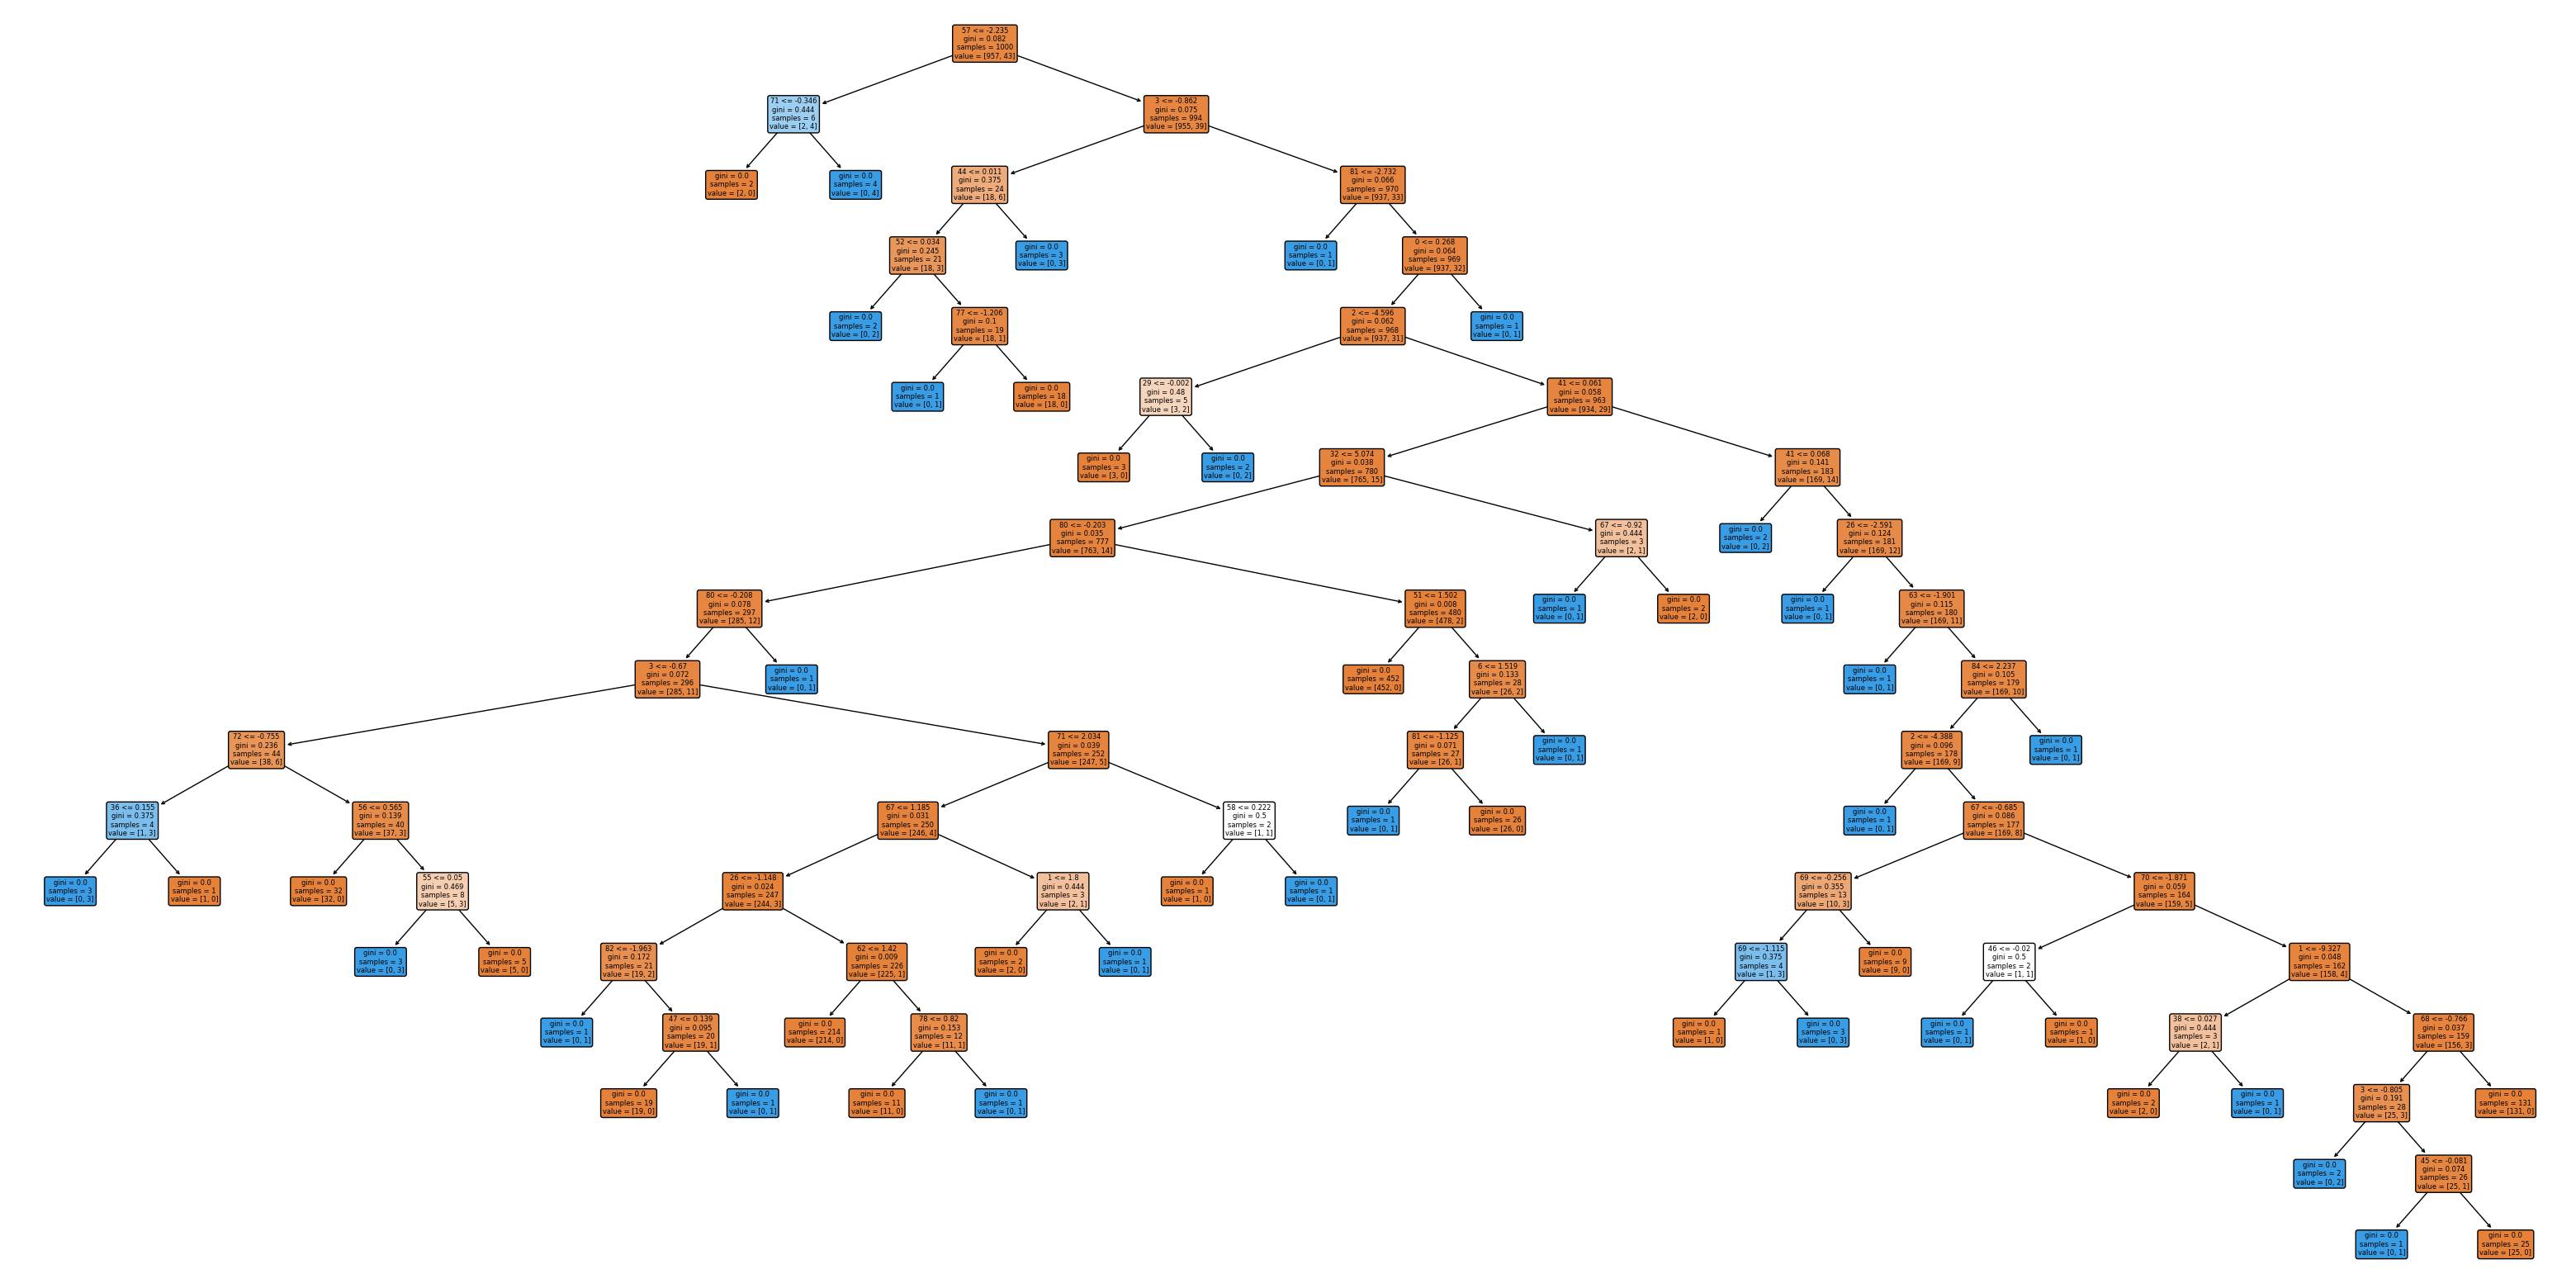

In [52]:
from sklearn import tree
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(Cls_sample, feature_names = Data_for_train.drop("Threat",axis=1).columns.astype(str), 
             filled=True, fontsize=6, rounded = True)
plt.show()

In [42]:
#Only a slight improvement, what if I reduce the no. of non-threat samples i.e. some kind of random undersampling 
#and then train it
reduced_data = pd.concat([data.iloc[:30000],Syn_data]).reset_index(drop=True)

In [43]:
reduced_data = reduced_data.sample(frac=1,axis=0).sample(frac=1).reset_index(drop=True)

In [44]:
Cls2 = DecisionTreeClassifier()
Cls2.fit(np.array(reduced_data.drop("Threat",axis=1)),np.array(reduced_data["Threat"]))

DecisionTreeClassifier()

In [45]:
evaluate_tree(Cls2,test_X,test_Y)

Recall Score: 0.5
Precision Score: 0.002950876583926402
AUC Score: 0.6061554642892919


## Alright we are seeing some improvement, what if keep the ratio of "threat" to "non-threat" large

In [94]:
Biased_data = pd.concat([data.iloc[:20000],Syn_data]).reset_index(drop=True)

In [128]:
Cls3 = DecisionTreeClassifier(criterion="entropy",max_depth = 15)
Cls3.fit(np.array(Biased_data.drop("Threat",axis=1)),np.array(Biased_data["Threat"]))

DecisionTreeClassifier(criterion='entropy', max_depth=15)

In [129]:
evaluate_tree(Cls3,test_X,test_Y)

Recall Score: 0.7058823529411765
Precision Score: 0.0026563364692861096
AUC Score: 0.6272825568171775


In [134]:
Cls8 = DecisionTreeClassifier(max_depth = 15,max_leaf_nodes = 25 )
Cls8.fit(np.array(Biased_data.drop("Threat",axis=1)),np.array(Biased_data["Threat"]))

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=25)

In [135]:
evaluate_tree(Cls8,test_X,test_Y)

Recall Score: 0.6764705882352942
Precision Score: 0.0032782212086659066
AUC Score: 0.6631125855130192


In [197]:
Cls9 = DecisionTreeClassifier(max_depth = 15,max_leaf_nodes = 25)
Cls9.fit(np.array(Biased_data.drop("Threat",axis=1)),np.array(Biased_data["Threat"]))

DecisionTreeClassifier(max_depth=15, max_leaf_nodes=25)

In [198]:
evaluate_tree(Cls9,test_X,test_Y)

Recall Score: 0.6764705882352942
Precision Score: 0.0032782212086659066
AUC Score: 0.6631125855130192


## The value of the parameters max_depth=15 and max_leaf_nodes=15 had to be figured out manually, because using Grid SearchCV just led to the values that overfit the training data but perform severly poor on testing data

### Pruning: Setting the ccp_alpha param. below 0.0005 doesn't really make a difference and  any value >0.0005 makes the model too  simple and it performs too bad on the test data.

In [116]:
Cls3.get_depth()#One of the reasons it is overfitting.

50

In [107]:
Cls3.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

## Increasing the ratio further

In [49]:
Biased_data_2 = pd.concat([data.iloc[:10000],Syn_data]).reset_index(drop=True)

In [50]:
Cls4 = DecisionTreeClassifier()
Cls4.fit(np.array(Biased_data_2.drop("Threat",axis=1)),np.array(Biased_data_2["Threat"]))
evaluate_tree(Cls4,test_X,test_Y)

Recall Score: 0.47058823529411764
Precision Score: 0.0028253575843192654
AUC Score: 0.593878711456535


### Obviously the performance decreased, coz this time "non-threats" became a minority, I am gonna use grid search CV to figure out which parameters work best for our decision trees

In [84]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [81]:
from sklearn.model_selection import GridSearchCV
GridSearchCV()

In [88]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=DecisionTreeClassifier(),
            param_grid={"criterion":criterion,
                       "max_depth":max_depth},
            scoring='roc_auc')
clf.fit(Biased_data.drop("Threat",axis=1),Biased_data["Threat"])

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='roc_auc')

In [89]:
clf.best_score_

0.7660175335636945

In [90]:
evaluate_tree(clf.best_estimator_,test_X,test_Y)

Recall Score: 0.7941176470588235
Precision Score: 0.002063116069381829
AUC Score: 0.5700028283375856


C:\Users\okher\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Not the best model, seems like it overfit the data or something, Plus one more issue that I see here is that there are just too many features here, let's see if we can trim them down

In [59]:
from sklearn.feature_selection import RFE
rfe = RFE(DecisionTreeClassifier())

In [60]:
rfe.fit_transform(Biased_data.drop("Threat",axis=1),Biased_data["Threat"])

array([[-0.01      , -0.43      ,  2.22      , ...,  0.36      ,
        -0.18      ,  0.07      ],
       [ 0.        , -4.11      ,  1.48      , ..., -0.24      ,
        -0.41      , -0.22      ],
       [ 0.01      , -5.03      , -2.78      , ...,  0.24      ,
        -0.1       ,  0.37      ],
       ...,
       [-0.01      ,  1.39165309,  2.47199229, ...,  0.23383734,
         0.02503842, -0.21336515],
       [-0.01792055,  0.95624282,  2.44798321, ...,  0.23498843,
         0.03020513, -0.1445905 ],
       [-0.01954488,  0.95867042,  2.54456558, ...,  0.23184655,
         0.03563174, -0.19699192]])

In [63]:
len(rfe.transform(Biased_data.drop("Threat",axis=1))[0])

44

## Alright the number of features has been significantly reduced, let's see if that helps our decision tree model in any way

In [71]:
Cls6 = DecisionTreeClassifier()
Cls6.fit(rfe.transform(Biased_data.drop("Threat",axis=1)),np.array(Biased_data["Threat"]))
evaluate_tree(Cls6,rfe.transform(test_X),test_Y)

Recall Score: 0.4117647058823529
Precision Score: 0.0024639211545230554
AUC Score: 0.5639410527308188


C:\Users\mahak\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RFE was fitted with feature names
  warnings.warn(


In [91]:
evaluate_tree(clf.best_estimator_,Biased_data.drop("Threat",axis=1),Biased_data["Threat"])

Recall Score: 0.9215604136667103
Precision Score: 0.8020918785890074
AUC Score: 0.7432745719723484


In [92]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

## Clearly Grid Search CV overfits the training data, we need to find ways to underfit it.

## Alright, here's What I am gonna do, take 50,000 samples from the given dataset, use the minority samples this time to generate 60,000 samples (random oversampling) just like before, train the model on (50,000 + 60,000) samples and then test the data on the previously remaining 50,000 samples 

In [203]:
Synthetic_data_2 = []
num = 1
for sample in minority_sample:
    print(num," Iter.")
    num+=1
    closest_30_samples = sorted(list(enumerate(np.linalg.norm(data-sample,axis=1))),key = lambda x:x[1])[1:31]
    for idx in closest_30_samples:
        sam = data.iloc[idx[0]]
        Synthetic_data_2.append(generate_minority_sample(sample,sam))
    

1  Iter.
2  Iter.
3  Iter.
4  Iter.
5  Iter.
6  Iter.
7  Iter.
8  Iter.
9  Iter.
10  Iter.
11  Iter.
12  Iter.
13  Iter.
14  Iter.
15  Iter.
16  Iter.
17  Iter.
18  Iter.
19  Iter.
20  Iter.
21  Iter.
22  Iter.
23  Iter.
24  Iter.
25  Iter.
26  Iter.
27  Iter.
28  Iter.
29  Iter.
30  Iter.
31  Iter.
32  Iter.
33  Iter.
34  Iter.
35  Iter.
36  Iter.
37  Iter.
38  Iter.
39  Iter.
40  Iter.
41  Iter.
42  Iter.
43  Iter.
44  Iter.
45  Iter.
46  Iter.
47  Iter.
48  Iter.
49  Iter.
50  Iter.
51  Iter.
52  Iter.
53  Iter.
54  Iter.
55  Iter.
56  Iter.
57  Iter.
58  Iter.
59  Iter.
60  Iter.
61  Iter.
62  Iter.
63  Iter.
64  Iter.
65  Iter.
66  Iter.
67  Iter.
68  Iter.
69  Iter.
70  Iter.
71  Iter.
72  Iter.
73  Iter.
74  Iter.
75  Iter.
76  Iter.
77  Iter.
78  Iter.
79  Iter.
80  Iter.
81  Iter.
82  Iter.
83  Iter.
84  Iter.
85  Iter.
86  Iter.
87  Iter.
88  Iter.
89  Iter.
90  Iter.
91  Iter.
92  Iter.
93  Iter.
94  Iter.
95  Iter.
96  Iter.
97  Iter.
98  Iter.
99  Iter.
100  Iter.
101  Ite

756  Iter.
757  Iter.
758  Iter.
759  Iter.
760  Iter.
761  Iter.
762  Iter.
763  Iter.
764  Iter.
765  Iter.
766  Iter.
767  Iter.
768  Iter.
769  Iter.
770  Iter.
771  Iter.
772  Iter.
773  Iter.
774  Iter.
775  Iter.
776  Iter.
777  Iter.
778  Iter.
779  Iter.
780  Iter.
781  Iter.
782  Iter.
783  Iter.
784  Iter.
785  Iter.
786  Iter.
787  Iter.
788  Iter.
789  Iter.
790  Iter.
791  Iter.
792  Iter.
793  Iter.
794  Iter.
795  Iter.
796  Iter.
797  Iter.
798  Iter.
799  Iter.
800  Iter.
801  Iter.
802  Iter.
803  Iter.
804  Iter.
805  Iter.
806  Iter.
807  Iter.
808  Iter.
809  Iter.
810  Iter.
811  Iter.
812  Iter.
813  Iter.
814  Iter.
815  Iter.
816  Iter.
817  Iter.
818  Iter.
819  Iter.
820  Iter.
821  Iter.
822  Iter.
823  Iter.
824  Iter.
825  Iter.
826  Iter.
827  Iter.
828  Iter.
829  Iter.
830  Iter.
831  Iter.
832  Iter.
833  Iter.
834  Iter.
835  Iter.
836  Iter.
837  Iter.
838  Iter.
839  Iter.
840  Iter.
841  Iter.
842  Iter.
843  Iter.
844  Iter.
845  Iter.
846  Iter.

1460  Iter.
1461  Iter.
1462  Iter.
1463  Iter.
1464  Iter.
1465  Iter.
1466  Iter.
1467  Iter.
1468  Iter.
1469  Iter.
1470  Iter.
1471  Iter.
1472  Iter.
1473  Iter.
1474  Iter.
1475  Iter.
1476  Iter.
1477  Iter.
1478  Iter.
1479  Iter.
1480  Iter.
1481  Iter.
1482  Iter.
1483  Iter.
1484  Iter.
1485  Iter.
1486  Iter.
1487  Iter.
1488  Iter.
1489  Iter.
1490  Iter.
1491  Iter.
1492  Iter.
1493  Iter.
1494  Iter.
1495  Iter.
1496  Iter.
1497  Iter.
1498  Iter.
1499  Iter.
1500  Iter.
1501  Iter.
1502  Iter.
1503  Iter.
1504  Iter.
1505  Iter.
1506  Iter.
1507  Iter.
1508  Iter.
1509  Iter.
1510  Iter.
1511  Iter.
1512  Iter.
1513  Iter.
1514  Iter.
1515  Iter.
1516  Iter.
1517  Iter.
1518  Iter.
1519  Iter.
1520  Iter.
1521  Iter.
1522  Iter.
1523  Iter.
1524  Iter.
1525  Iter.
1526  Iter.
1527  Iter.
1528  Iter.
1529  Iter.
1530  Iter.
1531  Iter.
1532  Iter.
1533  Iter.
1534  Iter.
1535  Iter.
1536  Iter.
1537  Iter.
1538  Iter.
1539  Iter.
1540  Iter.
1541  Iter.
1542  Iter.
1543

In [207]:
Synthetic_data_2_np = np.array(Synthetic_data_2)
Synthetic_data_2_df = pd.DataFrame(Synthetic_data_2_np)
Synthetic_data_2_df[88] = pd.Series([1]*len(Synthetic_data_2_np))
Synthetic_data_2_df.rename({88:"Threat"},axis=1,inplace=True)
Synthetic_data_2_df.to_csv("Synth_threat_data-2.csv")
Syn_data_2 = pd.read_csv("Synth_threat_data-2.csv")
Syn_data_2.drop(["Unnamed: 0"],axis=1,inplace=True)

In [213]:
data_sample  = data.sample(frac = 0.5)

In [227]:
test_sample = data.drop(list(data_sample.index)).reset_index(drop=True)

In [228]:
train_data_2 = pd.concat([data_sample,Syn_data_2]).reset_index(drop=True)

In [229]:
train_data_2 = train_data_2.sample(frac=1,axis=0).sample(frac=1).reset_index(drop=True) #Random Shuffling

In [280]:
Cls10 = DecisionTreeClassifier(max_depth = 65) #The max_depth has been figured out manually, anything lower or higher than this
#tends to underfit or overfit the data respectively
Cls10.fit(train_data_2.drop("Threat",axis=1),train_data_2["Threat"])

DecisionTreeClassifier(max_depth=65)

In [278]:
evaluate_tree(Cls10,test_sample.drop("Threat",axis=1),test_sample["Threat"]) 

Recall Score: 0.7469879518072289
Precision Score: 0.07408144976600617
AUC Score: 0.8641764153229378


In [279]:
evaluate_tree(Cls10,train_data_2.drop("Threat",axis=1),train_data_2["Threat"])

Recall Score: 0.9329343788691704
Precision Score: 0.9657161166292855
AUC Score: 0.9645376699911203


In [244]:
Cls10.get_depth()

50

## Conclusion:

### With enough synthetic data produced through random oversampling, the model seems to perform decently on the test data, though there are still signs of overfitting.

### With the attempts made above, the best metrics achieved on the test set are:
#### Recall Score: 0.7469879518072289
#### Precision Score: 0.07408144976600617
#### AUC Score: 0.8641764153229378

# Bonus Attempt

In [283]:
Bonus_data = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

In [285]:
Bonus_data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [395]:
##let's say we start with an assumption that anybody with an index above or equal to 4 is obese
Bonus_data["Obese"] = Bonus_data["Index"] >= 4
Bonus_data.drop("Index",axis=1,inplace=True)

In [286]:
# We'll start by defining a cost function for our tree, usually there are two cost functions that are usually employed: gini 
# entropy

# Now ginin entropy measures simply how well is a node or a split classifying our data. So suppose that we are trying to predict
#obesity and a particular split resulsts in 45 obese and 5 non-obese ending up together, that would classify the node as impure
# in gini terms, and this is usually calculated using the following formula:

# Gini Impurity = 1-square of all probabilities of each sample occuring.

def gini_impurity(y):
    if isinstance(y,pd.Series):
        p = y.value_counts() / y.size
        gini = 1-np.sum(p**2)
        return gini
    else:
        print("Input must be a pandas series object")

In [289]:
gini_impurity(pd.Series([1,2,5,6,2,1,7,8]))

0.8125

In [302]:
def entropy(y):
    if isinstance(y,pd.Series):
        p = y.value_counts() / y.size
        entropy = np.sum(-p*(np.log(p)/np.log(2))) # Since np.log takes natural log, we are dividing by ln(2) to make it log to the 
                                                   # base 2 
        return entropy
    else:
        print("Input must be a pandas object")

In [472]:
def information_gain(y,feature_used_for_split,func = entropy):
    """ In information gain, we basically try to evaluate whether a particular decision that we made was helpful or not
        which is judged on the basis of difference in the entropy between the parent and the child node. The higher the 
        difference, the better is the information gain and the better is the split
    """
    # So here mask represents the decisions that were made, it will contain 1s and 0s, so 0 might mean that the example 
    # corresponding to that value in y was classified as a particular class, and 0 to some other class
    # So here we basically measure the difference in the entropy of the parent node(Y indicates whatever samples are present in
    # the current node) and weighted average of the split that separated the variables into different classes, here the split
    # is gonna be two since our version of the decision tree only asks yes/no questions at every node
    
    a = sum(feature_used_for_split)
    b = feature_used_for_split.size - a 
    # Imagine if mask = [1,0,0,1,1,0], It would mean that the 1st, 4th and 5th samples were put in class 'A' and the rest in 
    # some class 'B', based on any particular question asked. So if a indicates the no. of samples in class 'A' (sum(mask)),
    # naturally b = number of entries in mask(size) - entries classified into a
    parent_node_entropy = func(y)
    child_nodes_weighted_average_entropy = (a/(a+b))*func(y[feature_used_for_split]) + (b/(b+a))*func(y[~feature_used_for_split])
    
    ig = parent_node_entropy - child_nodes_weighted_average_entropy
    return ig        

In [313]:
# To test information gain, let's say the present node has some classification as follows: [1,1,1,0,1,0] where 1s indicate that 
# the person is obese, whole 0s indicate otherwise and let weights from the above dataset indicate the value upon which we'll
# be making our decision here
current_node = pd.Series([1,1,1,0,1,0])
weights = Bonus_data["Weight"]

#Let's say we want to split the group based on who's above 80 kg and who's not and check the information gain that it delivers

information_gain(current_node,weights>80)# Voila! works!

0.2056180977247628

In [314]:
information_gain(current_node,weights>100) 

0.40772335032019336

### We're almost there, now we just need to calculate what's the best way 'split' for our features. Coz we can clearly see that information gain was more when we chose 100 kg as a split for our data than 80 kg.

### So one way to go about it would be figure out all the unique values that a particular feature takes in, and then for every value, we apply a 'filter' or a 'mask' or a 'condition'. Simply put just as above our split condition was weights > 100, for every feature, we will check whether the values are greater/less than a certain value and use that conditional creteria to split our data.  And check which value and what split gives us the most information gain.

In [322]:
Bonus_data["Weight"].unique()

array([ 96,  87, 110, 104,  61,  92, 111,  90, 103,  81,  80, 101,  51,
        79, 107, 129, 145, 139, 149,  97,  67,  64,  95,  62, 159, 152,
       121,  52,  65, 131, 153, 132, 114, 120, 108,  56, 118, 126,  76,
       122,  72, 135,  54, 105, 116,  89, 127,  70,  88, 143,  83, 158,
        59,  82, 136, 117,  75, 100, 154, 140, 123,  50, 141, 119, 156,
        69, 155, 160, 106,  66, 157,  60,  57, 138, 115, 151, 150, 147,
       124,  85, 125, 146,  98,  84, 102,  99,  78, 109,  94,  74,  73,
       134, 137, 144,  93,  86, 130,  58, 148,  68,  71,  63,  91, 142,
       133,  77, 128, 112,  55,  53], dtype=int64)

In [342]:
from time import time

In [473]:
def find_ig_for_splits(feature  = None ,current_node = Bonus_data["Obese"]):
#     if(not isinstance(feature,pd.Series)):
#         print("All the input must be Pandas Series")
#         return 
    unique_values = feature.unique()
    unique_values.sort()
    # Now ofcourse there's no point in using the smallest value as the filter coz every other data point falls on the other 
    # side of it so not really a split
    max_ig , best_split = 0,0
    for split in unique_values[1:]:
        ig = information_gain(current_node , feature < split)
        if(max_ig==0):
            max_ig = ig
            best_split = split
            continue
        if(ig > max_ig):
            max_ig = ig
            best_split = split
    return max_ig,best_split    

In [393]:
start = time()
find_best_split(current_node= Bonus_data["Obese"] , feature = weights)
print("Time Taken:",time()-start)

Time Taken: 0.4500601291656494


In [364]:
# So considering our current node still contains onlt the split that was made on the basis of the index, try and find the best 
# split and information gain for all our variables

In [474]:
j = Bonus_data.drop(["Obese","Gender"],axis=1).apply(find_ig_for_splits,current_node = Bonus_data["Obese"])

In [475]:
j.astype("float").iloc[0]

Height    0.064748
Weight    0.382454
Name: 0, dtype: float64

### Alright, so based on the above the best split for height offers an information gain of 0.064 and the best split value is 174. But for weight, the information gain offered is 0.3824 and the best split value is 103. Since weight offers a higher information gain, we use that as our first decisional split.

In [500]:
# Alright time to greate splits now based on the information gain that we get
def get_best_splits(target_feature , data):
    info = data.drop(target_feature,axis=1).apply(find_ig_for_splits,current_node = data[target_feature]).astype("float")
    
    #So info basically contains the highest information gain for each feature, and the split that generates the 
    #information gain for that feature
    #Since the 0th index contains the information gain delivered by that particular feature, we are getting the "feature"
    #that deilvers the max information gain at that step so that we can use it to make the split
    feature_to_split_on = info.iloc[0].idxmax()
    feature_value_to_split_on = info[feature_to_split_on][1]
    ig_offered = info[feature_to_split_on][0]
    
    return (feature_to_split_on,feature_value_to_split_on,ig_offered)

def make_splits(feature_to_split_on, split_value , data):
    split_1 = data[data[feature_to_split_on]<=split_value]
    split_2 = data[data[feature_to_split_on]>split_value]
    
    return split_1,split_2


## I forgot something, incase in the training part that I am coding if the conditions are not met, say the max_depth is 
# exceeded or the min_information requirement is not met, that would most prolly mean that I have encountered a leaf node, and 
# if that's the case then we should return the predictions right, that this sample was classified as obese or something

def make_pred(data):
    try:
        return data.value_counts().idxmax()
    except:
        return True
    

In [495]:
Bonus_data["Obese"].value_counts()

True     328
False    172
Name: Obese, dtype: int64

### So the splitting part is over and done with, but I haven't paid attention to the crucial detail that I played with in sklearn , how do I set the parameters like max_depth and which all do I need to include in my model

### Alright, so some googling tells me that max_depth, min_information_gain, and min_samples_split are the some of the most important ones that prevent your model from overfitting, so let's see if and how I can incorporate them.

In [505]:
def fit_tree(data = Bonus_data , target = "Obese", max_depth = 5 , min_samples_split = 3 , min_information_gain = 1e-5,
            depth_counter = 0):

    depth_exceeded = False
    min_samples_not_present = False
    if(depth_counter > max_depth):
        depth_exceeded = True
    if(data.size < min_samples_split):
        min_samples_not_present = True
    
    if(not(min_samples_not_present) and not(depth_exceeded)):
        split_feature , split_value , ig_offered = get_best_splits(target,data)
        
        if(ig_offered > min_information_gain):
            depth_counter += 1
            
            split1 , split2 = make_splits(split_feature , split_value , data)
            
            split_type = "<="
            question_asked = "{} {} {}".format(split_feature,split_type,split_value)
            subtree = {question_asked:[]}
            
            #Now apply conditions on the split that satisfied the condition
            yes = fit_tree(split1,target,max_depth,min_samples_split,min_information_gain,depth_counter)
            #And also to the the split that didn't
            no = fit_tree(split2,target,max_depth,min_samples_split,min_information_gain,depth_counter)
            
            if(yes == no):
                subtree = yes
            else:
                subtree[question_asked].append(yes)
                subtree[question_asked].append(no)
                
                
        else:
            # If information gain is not sufficient, donot split further and return the prediction
            return make_pred(data[target])
    else:
        #if depth is exceeded or min_samples is not satisified, donot split further and return the prediction
        return make_pred(data[target])
        
    return subtree

In [507]:
structure = fit_tree(data = Bonus_data.drop("Gender",axis=1))

### Now comes the crucial part, where we start to classify the actual samples that we are given, for that, whatever sets of conditions our model has provided us, we can apply those conditions on the data one by one and reach to the conclusion that we want to.

### But figuiring out what those conditions are is a difficult task, because I have stored it as a dictionary which means that I have to repeatedly access each and every condition(which is in string format) and then make the necessary comparison based on what the data is saying.

In [531]:
list(structure.keys())[0].split(' ')

['Weight', '<=', '103.0']

In [565]:
def predict(sample,conditions):
    cond = list(conditions.keys())[0]
    feature_and_values = cond.split(' ')
    #print("Conditions:",conditions)
    if(sample[feature_and_values[0]] <= np.float64(feature_and_values[2])):
        answer = conditions[cond][0]
    else:
        answer = conditions[cond][1]
    
    if(not isinstance(answer,dict)):
        return answer
    else:
        return predict(sample,answer)
        
    

In [566]:
predict(Bonus_data.drop("Gender",axis=1).iloc[3],structure)

False

In [549]:
structure["Weight <= 103.0"][1]['Weight <= 116.0'][0]['Height <= 189.0'][1]['Weight <= 115.0'][0]['Weight <= 115.0']

[{'Weight <= 115.0': [False, True]}, True]

In [555]:
New_Bonus = Bonus_data.drop("Gender",axis=1)

In [571]:
predictions = []
for idx in range(len(New_Bonus)):
    predictions.append(predict(New_Bonus.iloc[idx],structure))

In [572]:
np.sum(predictions == New_Bonus["Obese"])/len(New_Bonus["Obese"])        

0.95

# Cool, it works, now let's write it down in a better way and apply the same thing to the Threats Dataset

In [643]:
class Dec_Tree(object):
    def __init__(self, max_depth = 5 , min_samples_split = 3 , min_information_gain = 1e-5, criterion = 'entropy'):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_information_gain = min_information_gain
        if(criterion == 'gini'):
            print("We donot support gini impurity as a criterion, it will revert back to 'entropy' as default")
    
    def gini_impurity(self,y):
        if isinstance(y,pd.Series):
            p = y.value_counts() / y.size
            gini = 1-np.sum(p**2)
            return gini
        else:
            print("Input must be a pandas series object")
            
    # Alright time to greate splits now based on the information gain that we get
    def get_best_splits(self, target_feature , data):
        info = data.drop(target_feature,axis=1).apply(find_ig_for_splits,current_node = data[target_feature]).astype("float")

        #So info basically contains the highest information gain for each feature, and the split that generates the 
        #information gain for that feature
        #Since the 0th index contains the information gain delivered by that particular feature, we are getting the "feature"
        #that deilvers the max information gain at that step so that we can use it to make the split
        feature_to_split_on = info.iloc[0].idxmax()
        try:
            feature_value_to_split_on = info[feature_to_split_on][1]
            print("Info Variable:",info)
            print("Data Variable:",data)
            print("Feature to split on:",feature_to_split_on)
            print("\n\n")
        except:
            print("Info Variable:",info)
            print("Data Variable:",data)
            print("Feature to split on:",feature_to_split_on)
        ig_offered = info[feature_to_split_on][0]

        return (feature_to_split_on,feature_value_to_split_on,ig_offered)

    def make_splits(self,feature_to_split_on, split_value , data):
        split_1 = data[data[feature_to_split_on]<=split_value]
        split_2 = data[data[feature_to_split_on]>split_value]

        return split_1,split_2


    ## I forgot something, incase in the training part that I am coding if the conditions are not met, say the max_depth is 
    # exceeded or the min_information requirement is not met, that would most prolly mean that I have encountered a leaf node, and 
    # if that's the case then we should return the predictions right, that this sample was classified as obese or something

    def end_of_Tree_pred(self,data):
        try:
            return data.value_counts().idxmax()
        except:
            return True
        
    def fit_tree(self,data = Bonus_data , target = "Obese", depth_counter = 0):
        max_depth = self.max_depth
        min_samples_split = self.min_samples_split
        min_information_gain = self.min_information_gain
        
        depth_exceeded = False
        min_samples_not_present = False
        if(depth_counter > max_depth):
            depth_exceeded = True
        if(data.size < min_samples_split):
            min_samples_not_present = True

        if(not(min_samples_not_present) and not(depth_exceeded)):
            split_feature , split_value , ig_offered = self.get_best_splits(target,data)

            if(ig_offered > min_information_gain):
                depth_counter += 1

                split1 , split2 = self.make_splits(split_feature , split_value , data)

                split_type = "<="
                question_asked = "{} {} {}".format(split_feature,split_type,split_value)
                subtree = {question_asked:[]}

                #Now apply conditions on the split that satisfied the condition
                yes = self.fit_tree(split1,target,depth_counter)
                #And also to the the split that didn't
                no = self.fit_tree(split2,target,depth_counter)

                if(yes == no):
                    subtree = yes
                else:
                    subtree[question_asked].append(yes)
                    subtree[question_asked].append(no)


            else:
                # If information gain is not sufficient, donot split further and return the prediction
                return self.end_of_Tree_pred(data[target])
        else:
            #if depth is exceeded or min_samples is not satisified, donot split further and return the prediction
            return self.end_of_Tree_pred(data[target])

        return subtree
    
    def predict(self,sample,conditions):
        cond = list(conditions.keys())[0]
        feature_and_values = cond.split(' ')
        #print("Conditions:",conditions)
        if(sample[feature_and_values[0]] <= np.float64(feature_and_values[2])):
            answer = conditions[cond][0]
        else:
            answer = conditions[cond][1]

        if(not isinstance(answer,dict)):
            return answer
        else:
            return self.predict(sample,answer)
        
## Some Helper functions which are difficult to integreate as a class method and are being used as external methods:


def find_ig_for_splits(feature  = None ,current_node = None):
    #     if(not isinstance(feature,pd.Series)):
    #         print("All the input must be Pandas Series")
    #         return 
        global counter_for_samples
        counter_for_samples += 1
        print("Sample No.",counter_for_samples)
        unique_values = feature.unique()
        unique_values.sort()
        # Now ofcourse there's no point in using the smallest value as the filter coz every other data point falls on the other 
        # side of it so not really a split
        max_ig , best_split = 0,0
        for split in unique_values[1:]:
            ig = information_gain(current_node , feature < split)
            if(max_ig==0):
                max_ig = ig
                best_split = split
                continue
            if(ig > max_ig):
                max_ig = ig
                best_split = split
        return max_ig,best_split

    
    
    
def information_gain(y,feature_used_for_split):
        """ In information gain, we basically try to evaluate whether a particular decision that we made was helpful or not
            which is judged on the basis of difference in the entropy between the parent and the child node. The higher the 
            difference, the better is the information gain and the better is the split
        """
        # Defining our Criterion
        func = entropy
        # So here mask represents the decisions that were made, it will contain 1s and 0s, so 0 might mean that the example 
        # corresponding to that value in y was classified as a particular class, and 0 to some other class
        # So here we basically measure the difference in the entropy of the parent node(Y indicates whatever samples are present in
        # the current node) and weighted average of the split that separated the variables into different classes, here the split
        # is gonna be two since our version of the decision tree only asks yes/no questions at every node
        
        a = sum(feature_used_for_split)
        b = feature_used_for_split.size - a 
        # Imagine if mask = [1,0,0,1,1,0], It would mean that the 1st, 4th and 5th samples were put in class 'A' and the rest in 
        # some class 'B', based on any particular question asked. So if a indicates the no. of samples in class 'A' (sum(mask)),
        # naturally b = number of entries in mask(size) - entries classified into a
        parent_node_entropy = func(y)
        child_nodes_weighted_average_entropy = (a/(a+b))*func(y[feature_used_for_split]) + (b/(b+a))*func(y[~feature_used_for_split])

        ig = parent_node_entropy - child_nodes_weighted_average_entropy
        return ig  
    

def entropy(y):
        if isinstance(y,pd.Series):
            p = y.value_counts() / y.size
            entropy = np.sum(-p*(np.log(p)/np.log(2))) # Since np.log takes natural log, we are dividing by ln(2) to make it log to the 
                                                       # base 2 
            return entropy
        else:
            print("Input must be a pandas object")

            
counter_for_samples = 0


In [644]:
clf = Dec_Tree(min_samples_split = 2)

In [630]:
clf.fit_tree(Bonus_data.drop("Gender",axis=1),target = "Obese")

Sample No. 1
Sample No. 2


TypeError: Dec_Tree.fit_tree() takes from 1 to 4 positional arguments but 7 were given

## Alright, seems to work, now let's apply it on the threats dataset

In [594]:
decisions = clf.fit_tree(train_data_2,target="Threat")

KeyboardInterrupt: 

### There are just two many values to choose from, we have around 5,57,240 samples, where each sample has like 87 features, so 87 x  5,57,240 numbers to choose from for while checking for max_information_gain or the feature of best split, which is too much, hence the model I have built from scratch is taking too long.

## Let's try using our model on just 500 samples first

In [599]:
len(train_data_2.sample(frac=0.001))

557

In [622]:
decisions_trimmed = clf.fit_tree(train_data_2.sample(frac = 0.001),target="Threat")

Sample No. 1


TypeError: information_gain() missing 1 required positional argument: 'feature_used_for_split'

### Alright, there's a key error at some point in the execution, which is difficult to round out, judging from the sample number, it suggests were somewhere in 3rd or 4th Column, so I'm going to fit the tree in those columns and print the data that there is

In [614]:
train_data_2

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,Threat
0,0.00,2.028308,0.564529,12.66706,2.023682,0.918095,-0.311613,-0.078982,0.238666,0.092318,...,1.811776,0.418691,0.18793,-0.473987,0.065014,-0.153008,0.15577,0.467966,-0.12092,1
1,-0.01,-1.730000,2.140000,-0.52000,0.720000,0.310000,-0.120000,-0.070000,-0.130000,-0.220000,...,0.330000,-0.170000,-1.46000,-1.870000,-1.490000,0.690000,-0.21000,-0.150000,0.05000,0
2,-0.02,2.140000,2.090000,-0.23000,-0.460000,-0.700000,0.120000,0.680000,0.070000,0.890000,...,0.220000,0.400000,-0.76000,-0.460000,0.030000,-0.200000,2.01000,0.180000,-0.04000,0
3,-0.02,1.990000,-1.630000,-0.81000,1.090000,0.410000,0.420000,0.660000,-0.510000,0.450000,...,-0.100000,0.670000,0.35000,0.010000,0.450000,0.040000,-0.06000,0.310000,-0.10000,0
4,-0.02,1.900000,2.610000,-0.55000,0.840000,0.180000,-0.140000,-0.090000,-0.130000,-0.320000,...,0.130000,0.270000,-0.34000,0.900000,-0.130000,1.170000,-0.16000,0.300000,-0.08000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557235,-0.02,2.810000,-3.420000,-0.07000,-0.720000,2.660000,2.410000,-1.100000,-0.120000,-1.130000,...,0.070000,-0.080000,-0.31000,-0.980000,0.090000,-0.780000,0.16000,0.200000,-0.04000,0
557236,-0.01,-2.090000,2.330000,-0.43000,0.560000,0.180000,-0.190000,-0.300000,-0.010000,-0.290000,...,0.140000,-0.370000,-0.33000,0.120000,0.170000,-0.480000,0.04000,-1.660000,0.49000,0
557237,0.14,-6.290000,0.960000,-0.61000,0.510000,0.240000,0.300000,1.000000,-0.440000,2.400000,...,-0.220000,0.240000,0.67000,0.150000,0.490000,0.090000,-0.05000,0.120000,-0.05000,0
557238,-0.02,1.180000,2.040000,-0.25000,-0.020000,-0.730000,0.270000,-0.950000,0.210000,0.310000,...,0.060000,0.890000,-0.70000,-0.180000,-0.040000,-0.090000,-0.42000,-0.160000,-0.01000,0


In [645]:
decisions_tests = clf.fit_tree(train_data_2[["3","4","Threat"]].sample(frac=0.001),target="Threat")

Sample No. 1
Sample No. 2
Info Variable:            3         4
0   0.008981  0.020633
1  13.243983  0.832313
Data Variable:            3     4  Threat
252596 -0.46  0.65       0
234909 -0.64  0.92       0
100942 -0.03 -0.99       0
425454  0.28  0.37       0
314470 -0.39  0.48       0
...      ...   ...     ...
301474 -0.42 -0.13       0
473342 -0.16 -0.68       0
235267 -0.22  0.07       0
390879 -0.49  0.61       0
142672 -0.75  0.84       0

[557 rows x 3 columns]
Feature to split on: 4



Sample No. 3
Sample No. 4
Info Variable:           3         4
0  0.006552  0.009393
1  0.520000  0.832313
Data Variable:            3     4  Threat
252596 -0.46  0.65       0
100942 -0.03 -0.99       0
425454  0.28  0.37       0
314470 -0.39  0.48       0
217741 -0.54  0.71       0
...      ...   ...     ...
326537 -0.12 -0.93       0
301474 -0.42 -0.13       0
473342 -0.16 -0.68       0
235267 -0.22  0.07       0
390879 -0.49  0.61       0

[392 rows x 3 columns]
Feature to split on: 4



Sampl

Sample No. 34
Info Variable:           3         4
0  0.020442  0.061164
1 -0.792460  0.980000
Data Variable:            3     4  Threat
40800  -0.78  0.98       0
278112 -0.72  0.99       0
186367 -0.90  1.05       0
71452  -0.85  1.15       0
194798 -0.84  1.07       0
...      ...   ...     ...
247197 -0.79  1.05       1
491590 -0.81  1.02       0
147072 -0.91  1.12       1
335284 -0.76  0.98       0
125254 -0.75  1.03       0

[84 rows x 3 columns]
Feature to split on: 4



Sample No. 35
Sample No. 36
Info Variable:           3         4
0  0.223149  0.117981
1  0.170000  1.980000
Data Variable:                 3         4  Threat
72082    0.170000  1.360000       0
264032  12.670000  1.990000       0
113322   0.044328  1.215627       1
48021   12.600000  1.980000       0
520075  13.280000  1.880000       0
523573  13.311309  1.930647       1
475702   6.355066  1.091672       1
296887   0.053146  1.490000       1
333254  13.310000  1.960000       1
191583  13.350000  1.800000      

In [647]:
clf.predict(train_data_2[["3","4","Threat"]].iloc[3],conditions=decisions_tests)

0

In [652]:
test_data = train_data_2[["3","4","Threat"]].sample(frac = 0.002)

In [653]:
predictions = []
for idx in range(len(test_data)):
    predictions.append(predict(test_data.iloc[idx],decisions_tests))

In [655]:
Y_pred  = predictions
test_Y = test_data["Threat"]
print("Recall Score:",recall_score(test_Y,Y_pred))
print("Precision Score:",precision_score(test_Y,Y_pred))
print("AUC Score:",roc_auc_score(test_Y,Y_pred))

Recall Score: 0.034482758620689655
Precision Score: 0.3333333333333333
AUC Score: 0.5132333632782807


### The AUC score is impressive given that the model was only trained on like 500 samples and made predictions on an unseen set of 1000 samples, but the main issue here is with the vast number of features that we have, it makes it nearly impossible to measure the performance on the actual dataset